In [925]:
import warnings
from typing import Union
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Step 1: Reading and understanding the data

In [926]:
df = pd.read_csv("Real estate.csv")

In [927]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [928]:
df.shape

(414, 8)

In [929]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [931]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Step 2: Data cleaning and preparation

In [932]:
df.drop(['No', 'X1 transaction date'], inplace=True, axis=1)

In [933]:
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [934]:
train_y = df.pop('Y house price of unit area')

In [935]:
train_y = train_y.to_numpy()

In [936]:
train_y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

### Step 3: Visualizing the data¶

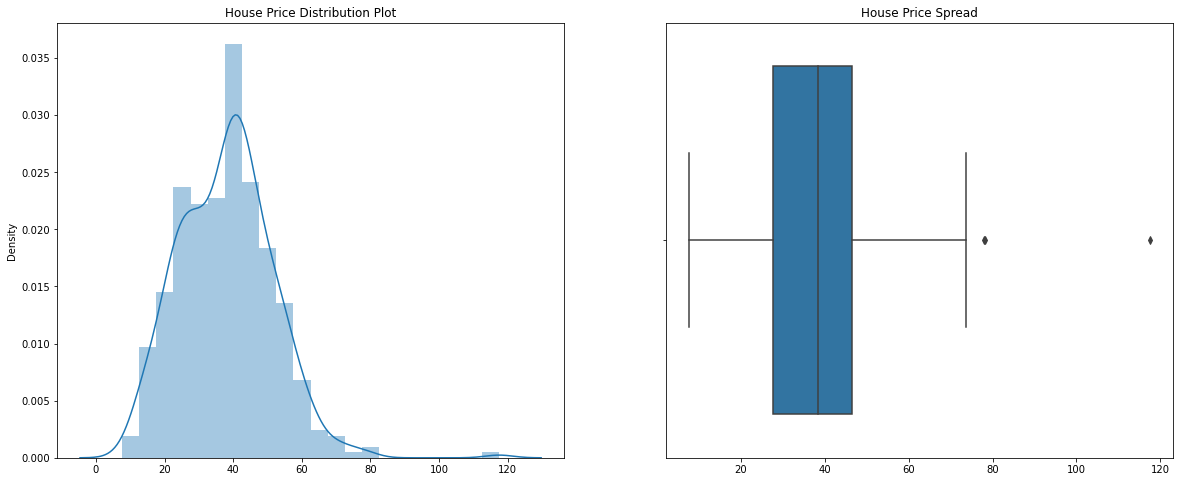

In [937]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(train_y)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(train_y)

plt.show()

In [938]:
print(pd.Series(train_y).describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
85%       51.700000
90%       54.940000
100%     117.500000
max      117.500000
dtype: float64


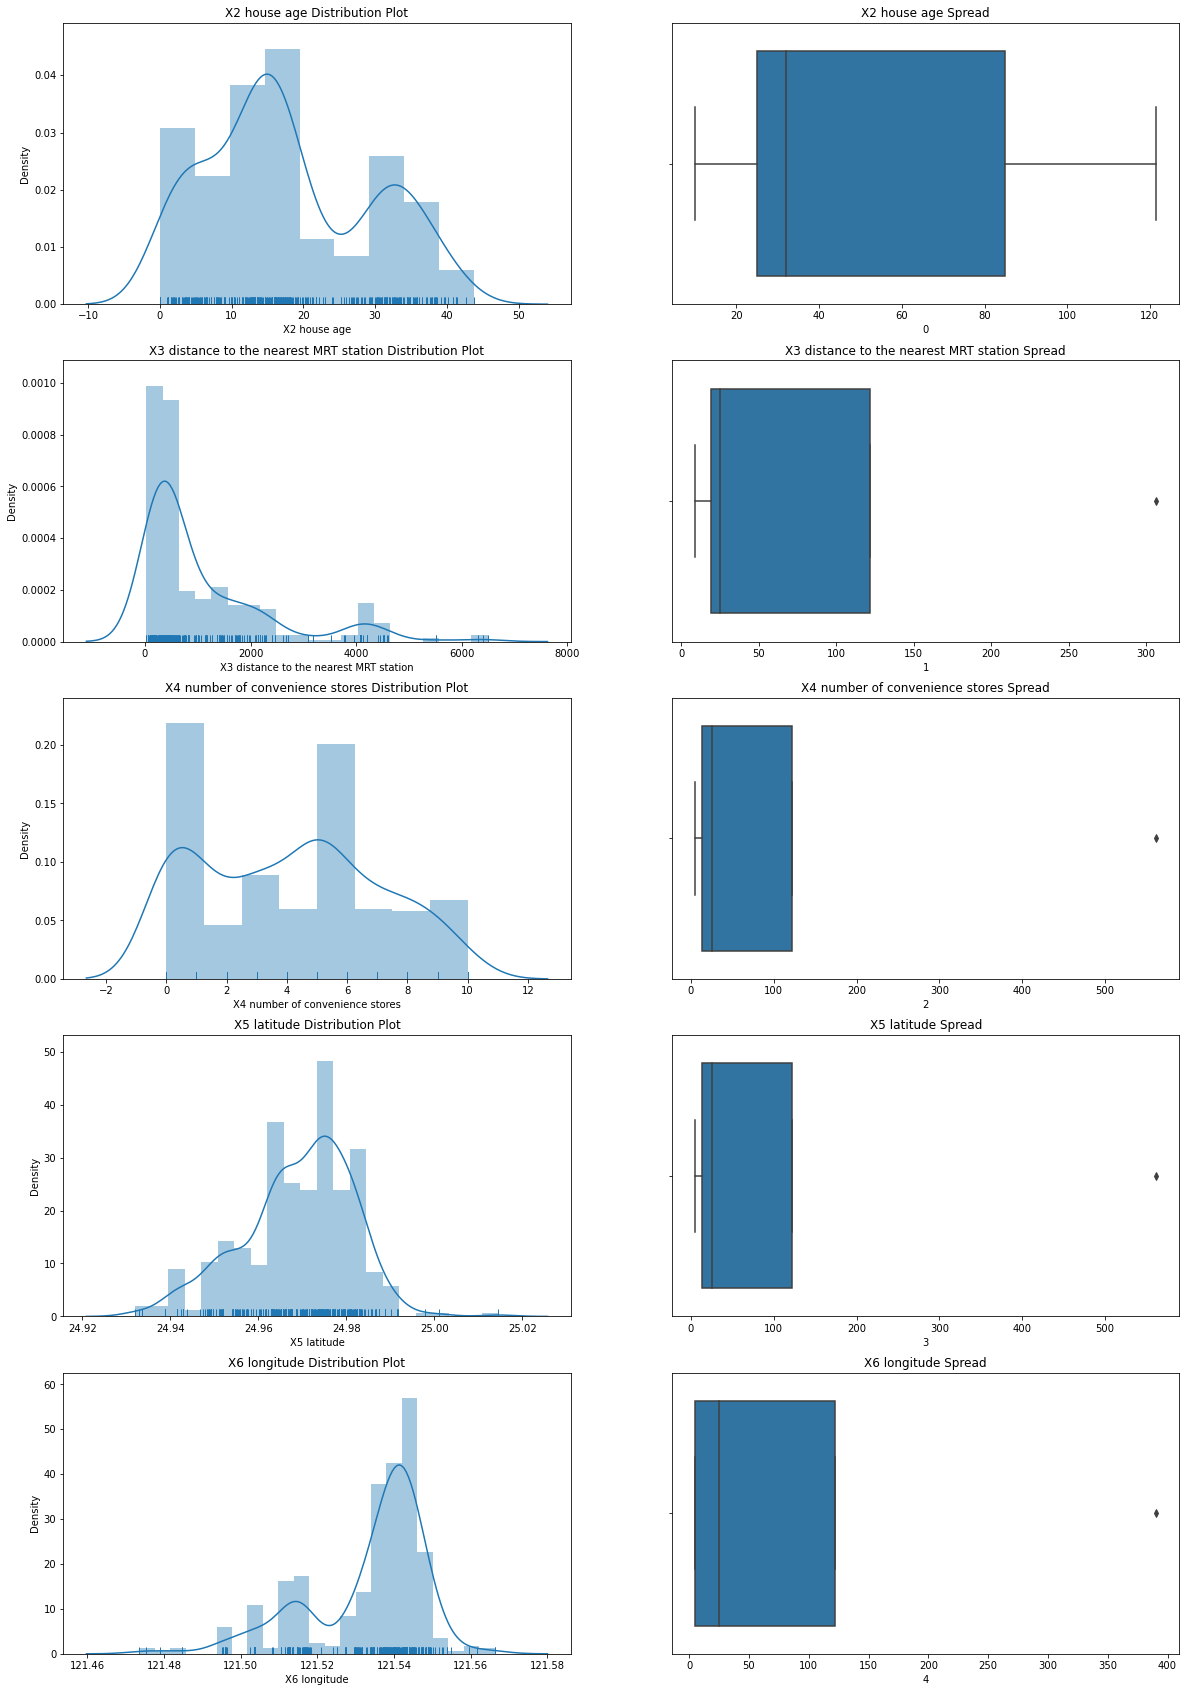

In [939]:
plt.figure(figsize=(20,30))

k = 1
for i in range(5):
    plt.subplot(5, 2, k)
    plt.title(f"{df.columns[i]} Distribution Plot")
    sns.distplot(df.iloc[:,i], kde=True, rug=True)
    k += 1
        
    plt.subplot(5, 2, k)
    plt.title(f"{df.columns[i]} Spread")
    sns.boxplot(df.iloc[i])
    k += 1

### Step 4: Defining a linear regression model

In [940]:
def get_price(x: np.ndarray, w: np.ndarray, b: Union[int, float]) -> np.ndarray:
    return (x @ w) + b

In [941]:
def mse(y: np.ndarray, y_pred: np.ndarray) -> Union[int, float]:
    return np.mean((y - y_pred) ** 2)

In [942]:
t_x = np.ones((414, 5))
t_w = np.ones((5, 1))
b = 0
assert get_price(t_x, t_w, b).shape == (414, 1)

In [943]:
w = np.random.rand(5, 1)
b = 1
lr = 2e-1
epochs = 30
loss_history = np.zeros((epochs))
train_x = df.to_numpy()
train_y = train_y.reshape(-1, 1)

In [944]:
print(train_x)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [945]:
scalers = {
            "1": MinMaxScaler(),
            "2": MinMaxScaler(),
            "3": MinMaxScaler(),
            "4": MinMaxScaler(),
            "5": MinMaxScaler(),
            "y": MinMaxScaler()
}

for i in range(5):
    train_x[:,i] = scalers[f"{i+1}"].fit_transform(train_x[:,i].reshape(-1, 1)).reshape(-1)
    
train_y = scalers["y"].fit_transform(train_y)

In [946]:
print(train_x)

[[0.73059361 0.00951267 1.         0.61694135 0.71932284]
 [0.44520548 0.04380939 0.9        0.5849491  0.71145137]
 [0.30365297 0.08331505 0.5        0.67123122 0.75889584]
 ...
 [0.42922374 0.05686115 0.7        0.57149782 0.71522536]
 [0.18493151 0.0125958  0.5        0.42014057 0.72395946]
 [0.14840183 0.0103754  0.9        0.51211827 0.75016174]]


In [947]:
print(train_y)

[[0.27570519]
 [0.31483167]
 [0.36123749]
 [0.42948135]
 [0.32302093]
 [0.22292994]
 [0.29754322]
 [0.35577798]
 [0.10191083]
 [0.13193813]
 [0.30755232]
 [0.45950864]
 [0.28844404]
 [0.14740673]
 [0.24294813]
 [0.39035487]
 [0.56869882]
 [0.2711556 ]
 [0.31574158]
 [0.36487716]
 [0.19745223]
 [0.40036397]
 [0.15468608]
 [0.366697  ]
 [0.28389445]
 [0.17652411]
 [0.4422202 ]
 [0.23657871]
 [0.35850773]
 [0.45040946]
 [0.13193813]
 [0.15832575]
 [0.24203822]
 [0.37943585]
 [0.4322111 ]
 [0.17925387]
 [0.13921747]
 [0.16105551]
 [0.36487716]
 [0.35122839]
 [0.0755232 ]
 [0.09645132]
 [0.24658781]
 [0.2411283 ]
 [0.42129208]
 [0.27934486]
 [0.31301183]
 [0.49044586]
 [0.05277525]
 [0.05095541]
 [0.33303003]
 [0.11919927]
 [0.17652411]
 [0.28480437]
 [0.40127389]
 [0.055505  ]
 [0.31210191]
 [0.41765241]
 [0.13648772]
 [0.3166515 ]
 [0.12465878]
 [0.50591447]
 [0.18289354]
 [0.43130118]
 [0.16105551]
 [0.33393995]
 [0.3921747 ]
 [0.44767971]
 [0.26023658]
 [0.31301183]
 [0.46769791]
 [0.30

In [948]:
print(w)

[[0.16735556]
 [0.44847773]
 [0.3703297 ]
 [0.92519154]
 [0.20795721]]


In [949]:
print(train_x.shape)
print(train_y.shape)

(414, 5)
(414, 1)


In [950]:
for i in range(epochs):
    y_pred = get_price(train_x, w, b)
    loss = mse(train_y, y_pred)
    
    d_w = -2 * np.mean((train_y - y_pred) * train_x)
    d_b = -2 * np.mean(train_y - y_pred)
    
    w -= d_w * lr
    b -= d_b * lr
    
    print(f"Epoch: {i}, Loss: {loss}")
    loss_history[i] = loss

Epoch: 0, Loss: 2.4758324076733214
Epoch: 1, Loss: 0.16710552036433626
Epoch: 2, Loss: 0.02343410019186381
Epoch: 3, Loss: 0.014472122221616939
Epoch: 4, Loss: 0.013892108847224272
Epoch: 5, Loss: 0.013833998833321778
Epoch: 6, Loss: 0.013808735265943829
Epoch: 7, Loss: 0.013785882838035685
Epoch: 8, Loss: 0.013763541637814965
Epoch: 9, Loss: 0.013741587322396696
Epoch: 10, Loss: 0.013720006128281606
Epoch: 11, Loss: 0.013698791274482567
Epoch: 12, Loss: 0.013677936515024351
Epoch: 13, Loss: 0.013657435736075335
Epoch: 14, Loss: 0.013637282929203264
Epoch: 15, Loss: 0.013617472188061763
Epoch: 16, Loss: 0.013597997706562722
Epoch: 17, Loss: 0.013578853777168665
Epoch: 18, Loss: 0.013560034789219595
Epoch: 19, Loss: 0.013541535227288645
Epoch: 20, Loss: 0.013523349669565593
Epoch: 21, Loss: 0.013505472786267885
Epoch: 22, Loss: 0.013487899338078566
Epoch: 23, Loss: 0.013470624174610767
Epoch: 24, Loss: 0.01345364223289824
Epoch: 25, Loss: 0.013436948535911505
Epoch: 26, Loss: 0.01342053

In [951]:
print(w)
print(b)

[[-0.16532587]
 [ 0.1157963 ]
 [ 0.03764827]
 [ 0.59251012]
 [-0.12472421]]
0.12695600674809068


In [952]:
print( scalers["y"].inverse_transform(get_price(train_x, w, b)).reshape(-1))

[42.85007376 46.08274706 52.4704805  52.4704805  49.40802139 42.76478804
 39.31637838 44.12595249 32.88608511 40.53198576 32.07044623 45.85982343
 35.81933192 36.9942375  57.97614002 37.64119885 49.86603524 40.96962325
 35.99757727 41.98288596 44.26511065 44.0697763  23.18926914 44.2357061
 30.74248543 40.8528011  51.13506924 28.93742466 40.00692619 45.04145143
 29.13343991 44.72823004 30.83182404 44.10882269 49.36321338 82.29138644
 39.06352964 24.30929527 44.46601386 46.50946344 26.90575405 26.72611537
 24.60233393 44.18339456 45.57872151 30.09067685 36.80795826 34.08701468
 28.90082818 28.92466411 38.66497823 17.9992897  39.00194831 35.69488457
 46.55094589 16.17768915 33.63260622 33.68429747 28.55132207 29.99788949
 40.40596965 46.26143871 38.56094598 45.62020396 29.47683521 33.05643586
 40.54471076 37.69030869 40.29361566 52.8023401  45.73537608 34.25294448
 37.03733461 26.82278915 54.62608188 24.18484792 35.22481172 37.38529245
 33.31518256 21.68791055 41.80381865 27.59401434 36.

In [953]:
print(train_y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

Text(0, 0.5, 'loss')

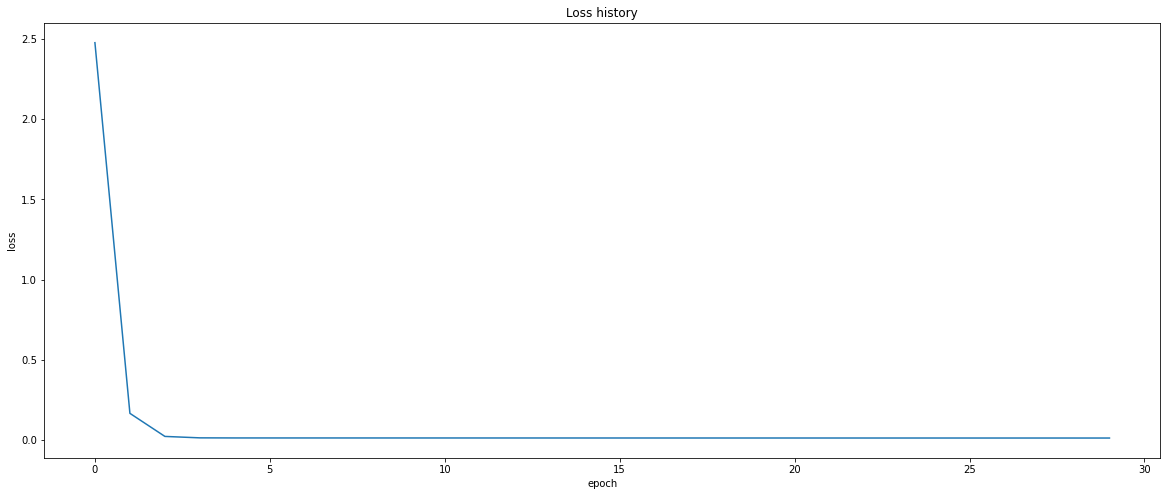

In [959]:
plt.figure(figsize=(20,8))
plt.title("Loss history")

sns.lineplot(data=loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")